In [2]:
from xlrd import * 
import re
def Load_Dictionary():
    #open_workbook('dictionary.xlsx')
    X = []
    wb = open_workbook('dictionary.xlsx')
    start = False
    for s in wb.sheets():
        for row in range(s.nrows):
                temp = []
                values = []

                for col in range(s.ncols):
                    values.append(s.cell(row,col).value)
                if type(values[0])==float:
                    values[0] = int(values[0])
                if type(values[1])==float:
                    values[1] = int(values[1])
                temp.append(values[0])
                temp.append(values[1])
                if temp[0]=='':
                    temp[0]=X[row-1][0]
                if temp[1]=='':
                    temp[1]=X[row-1][1]
                X.append(temp)
    X = X[1:]
    for x in range(len(X)):
        for y in range(2):
              X[x][y] = str(X[x][y])
    temp = []
    k = 0
    X_prime = X
    for i in range(len(X)):
        if(i>0):
            if(X[i][0]==X[i-1][0]):
                temp[k-1].append(X[i][1])
            else:
                k+=1
                temp.append(X[i])
    Dictionary = temp
    return Dictionary

In [3]:
def LCS(X, Y):
    m = len(X)
    n = len(Y)
    # An (m+1) times (n+1) matrix
    C = [[0] * (n + 1) for _ in range(m + 1)]
    for i in range(1, m+1):
        for j in range(1, n+1):
            if X[i-1] == Y[j-1]: 
                C[i][j] = C[i-1][j-1] + 1
            else:
                C[i][j] = max(C[i][j-1], C[i-1][j])
    return C

In [4]:
def Load_Twit_Data():
    Twits = []
    #with open("/home/melvin/LogLinear/Dataset_2016 for PhD/SMS_tweet/Mobile_tweet1.txt") as f:
    with open("tweetdata.txt") as f:
        for line in f:
            Twits.append(line)
    for i in range(len(Twits)):
        Twits[i] = Twits[i].replace('\r\n','')
    return Twits

In [5]:
import numpy as np
def Preprocess_Twits_and_Dictionary(X):
    #convert all string to lower case.
    for i in range(len(X)):
        X[i] = X[i].lower()
    for i in range(len(Twits)):
        Twits[i] = Twits[i].lower()
    for i in range(len(Y)):
        for j in range(len(Y[i])):
            Y[i][j] = Y[i][j].lower()
    #Removal of panctuations.
    for i in range(len(Twits)):
        Twits[i] = Twits[i].replace('</s>','')
        Twits[i] = Twits[i].replace('<s>','')
    import string
    for i in range(len(Twits)):
        for c in string.punctuation:
            Twits[i] = Twits[i].replace(c," ")
    for i in range(len(Twits)):
        Twits[i] = '<s> '+Twits[i]+' </s>'
    for m in range(10): 
        for i in range(len(Twits)):
            Twits[i] = Twits[i].replace('  ',' ')    
    for i in range(len(Y)):
        for j in range(len(Y[i])):
            for c in string.punctuation:
                Y[i][j] = Y[i][j].replace(c," ")
    #Removal of multiple spaces.
    for m in range(10): 
        for i in range(len(Y)):
            for j in range(len(Y[i])):
                for c in string.punctuation:
                    Y[i][j] = Y[i][j].replace('  ',' ')            
    Preprocessed_Twits = Twits
    return Preprocessed_Twits, Dictionary

In [6]:
def levenshtein(s1, s2):
    if len(s1) < len(s2):
        return levenshtein(s2, s1)

    # len(s1) >= len(s2)
    if len(s2) == 0:
        return len(s1)

    previous_row = range(len(s2) + 1)
    for i, c1 in enumerate(s1):
        current_row = [i + 1]
        for j, c2 in enumerate(s2):
            insertions = previous_row[j + 1] + 1 # j+1 instead of j since previous_row and current_row are one character longer
            deletions = current_row[j] + 1       # than s2
            substitutions = previous_row[j] + (c1 != c2)
            current_row.append(min(insertions, deletions, substitutions))
        previous_row = current_row
    
    return previous_row[-1]

In [7]:
def levenshtein_ratio(s1, s2):
    Ldist = levenshtein(s1, s2)
    return float((len( s1 )+len( s2 ))-Ldist) / float(len( s1 )+len( s2 ))

In [8]:
def count_bi_gram(X,token):
    counts = sum([row.count(token) for row in X])
    return counts
def count_unigram(X,token):
    counts = sum([row.count(token) for row in X])
    return counts

In [9]:
def Create_target_keys(Y):
    k = 0
    Key_Dictionary = []
    for i in range(len(Y)):
        for j in range(len(Y[i])):
            temp = [k,Y[i][j]]
            Key_Dictionary.append(temp)
            k+=1
    Key_Dictionary = {Key_Dictionary[i][1]: Key_Dictionary[i][0] for i in range(0, len(Key_Dictionary))}
    return Key_Dictionary

In [10]:
def Uni_grams(X):
    Uni = []
    for i in X:
        temp = i.split(" ")
        Uni.append(temp)
    return Uni

In [11]:
def Bi_grams(X):
    bi_grams = []
    Uni = Uni_grams(X)
    for i in range(len(Uni)):
        temp = []
        for j in range(len(Uni[i])-2):
            bi = Uni[i][j]+" "+Uni[i][j+1]
            temp.append(bi)
        bi_grams.append(temp)
    return bi_grams

In [12]:
def Conditional_Probability1(c1,c2,Twits):
    Uni = Uni_grams(Twits)
    Bi = Bi_grams(Twits)
    num = count_bi_gram(Bi,c1+" "+c2)
    den = count_unigram(Uni,c1)
    probability = float(num)/float(den)
    return probability

In [13]:
def backTrack(C, X, Y, i, j):
    if i == 0 or j == 0:
        return ""
    elif X[i-1] == Y[j-1]:
        return backTrack(C, X, Y, i-1, j-1) + X[i-1]
    else:
        if C[i][j-1] > C[i-1][j]:
            return backTrack(C, X, Y, i, j-1)
        else:
            return backTrack(C, X, Y, i-1, j)

In [14]:
def backTrackAll(C, X, Y, i, j):
    if i == 0 or j == 0:
        return set([""])
    elif X[i-1] == Y[j-1]:
        return set([Z + X[i-1] for Z in backTrackAll(C, X, Y, i-1, j-1)])
    else:
        R = set()
        if C[i][j-1] >= C[i-1][j]:
            R.update(backTrackAll(C, X, Y, i, j-1))
        if C[i-1][j] >= C[i][j-1]:
            R.update(backTrackAll(C, X, Y, i-1, j))
        return R

In [15]:
x = "AATCC"
y = "ACACG"
m = len(x)
n = len(y)
C = LCS(x, y)
print "Some LCS: '%s'" % backTrack(C, x, y, m, n)
print "All LCSs: %s" % backTrackAll(C, x, y, m, n)

Some LCS: 'AAC'
All LCSs: set(['ACC', 'AAC'])


In [16]:
def LCS_Ratio(X, Y):
    m = len(X)
    n = len(Y)
    C = LCS(X, Y)
    ratio = float(len(backTrack(C, X, Y, m, n)))/float(m)
    return ratio

In [17]:
def Similarity_measure(C2,Target):
    similarity = []
    #print C2, Target
    for i in Target:
        LCSRatio = LCS_Ratio(i, C2)
        similarity.append([LCSRatio,i])
    return similarity
            

In [18]:
def Similarity_measure_Testing(C2,Target):
    similarity = []
    LCSRatio = LCS_Ratio(Target, C2)    
    return LCSRatio

In [19]:
#def Maximum_Probability(C2,similarity,probability,temp,Key_Dictionary):
def Maximum_Probability(C2,similarity,probability,Key_Dictionary):
    maximum_probability = 0
    target = ""
    Vs = C2
    for j in range(len(similarity)):
        #answer = (similarity[j][0] + probability + temp[j])/float(3)
        answer = (similarity[j][0] + probability)/float(2)
        if answer>maximum_probability:
            maximum_probability = answer
            target = similarity[j][1]
            #Vs_features = [similarity[j][0],probability,temp[j]]
            Vs_features = [similarity[j][0],probability]
            Target_Key = Key_Dictionary[target]
            Vt = target
    return Vs,Vt,Vs_features,Target_Key
    

In [20]:
def feature_vector_training(Twits,bi_grams,Key_Dictionary,Dictionary,X,Y):
    Vs = []
    Vt = ""
    temp = []
    Feature_vector = []
    New_Twits = []
    Y_Target = []
    Reconstructed_twit = []
    Training_abrivitions = []
    Training_Target = []
    k = 0
    for bigrams in bi_grams:
        Reconstructed_twit = ['<s>']
        temporary_features = []
        for i in range(len(bigrams)):
            C = bigrams[i].split(" ")
            C1 = C[0]
            C2 = C[1]
            if C2 in X:
                temp = []
                position = X.index(C2)
                similarity = Similarity_measure(C2, Y[position])
                probability = Conditional_Probability1(C1,C2,Twits)
                Vs,Vt,Vs_features,Target_Key = Maximum_Probability(C2,similarity,probability,Key_Dictionary)
                temp = []
                Feature_vector.append(Vs_features)
                Y_Target.append(Target_Key)
                Reconstructed_twit.append(Vt)
                Training_abrivitions.append(C2)
                Training_Target.append(Vt)
            else:
                C = bigrams[i].split(" ")
                Reconstructed_twit.append(C[1])
        Reconstructed_twit.append('</s>')
        New_Twits.append(" ".join(Reconstructed_twit))
        #print "####################################################################################"
        #print Twits[k]
        #print " ".join(Reconstructed_twit)
        k+=1
    return Feature_vector,Y_Target, Training_abrivitions, Training_Target


In [21]:

def flatten(x):
    """flatten(sequence) -> list

    Returns a single, flat list which contains all elements retrieved
    from the sequence and all recursively contained sub-sequences
    (iterables).

    Examples:
    >>> [1, 2, [3,4], (5,6)]
    [1, 2, [3, 4], (5, 6)]
    >>> flatten([[[1,2,3], (42,None)], [4,5], [6], 7, MyVector(8,9,10)])
    [1, 2, 3, 42, None, 4, 5, 6, 7, 8, 9, 10]"""

    result = []
    for el in x:
        #if isinstance(el, (list, tuple)):
        if hasattr(el, "__iter__") and not isinstance(el, basestring):
            result.extend(flatten(el))
        else:
            result.append(el)
    return result

In [22]:
def intersect(a, b):
     return list(set(a) & set(b))

In [23]:
def Unigrams(Twits):
    Uni_grams = []
    for i in Twits:
        Uni_grams.append(i.split(" ")) 
    return Uni_grams

In [24]:
def count_unigram(X,token):
    counts = sum([row.count(token) for row in X])
    return counts

In [25]:
Dictionary = Load_Dictionary()
X = []
Y = []
for data in Dictionary:
    Y.append(data[1:])
    X.append(data[0])
Twits = Load_Twit_Data()
Preprocessed_Twits, Dictionary = Preprocess_Twits_and_Dictionary(X)
Key_Dictionary = Create_target_keys(Y)
bi_grams = Bi_grams(Twits)
Feature_vector,Y_Target,Training_abrivitions,Training_Target = feature_vector_training(Twits,bi_grams,Key_Dictionary,Dictionary,X,Y)
CTraining_abrivitions = Training_abrivitions
CY_Target = Y_Target
CTraining_Target = Training_Target
CFeature_vector = Feature_vector
Uni_grams = Unigrams(Twits)

In [26]:
temp1 = []
temp2 = []
temp3 = []
temp4 = []
for i in range(len(CTraining_abrivitions)):
    frequency = count_unigram(Uni_grams,CTraining_abrivitions[i])
    if frequency > 20:
        temp1.append(CTraining_abrivitions[i])
        temp2.append(CY_Target[i])
        temp3.append(CFeature_vector[i])
        temp4.append(CTraining_Target[i])
CTraining_abrivitions = temp1
CY_Target = temp2
CFeature_vector = temp3
CTraining_Target = temp4

In [27]:
temp = []
temp1 = []
for i in range(len(Training_abrivitions)):
    if i==0:
        temp.append(Training_abrivitions[i])
        temp1.append(Feature_vector[i])
    else:
        if Training_abrivitions[i] not in temp:
            temp.append(Training_abrivitions[i])
            temp1.append(Feature_vector[i])
Unique_Training_abrivitions = temp
Unique_Feature_vector = temp1

In [28]:
Unique_Abriviation_frequencies = []
for i in Unique_Training_abrivitions:
    Unique_Abriviation_frequencies.append(count_unigram(Uni_grams,i))
print Unique_Abriviation_frequencies

[19, 1, 40, 1, 43, 394, 71, 207, 9, 23, 39, 10, 31, 1, 1, 1, 1, 32, 6, 33, 56, 1, 19, 1, 1, 12, 4, 4, 2, 2, 12, 18, 6, 10, 9, 1, 1, 113, 20, 13, 36, 51, 2, 30, 87, 23, 5, 12, 11, 11, 2, 1, 8, 18, 13, 37, 1, 7, 7, 2, 10, 8, 1, 4, 5, 3, 3, 1, 3, 1, 2, 1, 1, 6, 10, 1, 2, 1, 21, 94, 2, 5, 4, 1, 19, 1, 2, 25, 1, 14, 1, 5, 6, 1, 6, 2, 1, 2, 1, 1, 6, 5, 2, 3, 2, 5, 1, 7, 10, 5, 4, 2, 37, 2, 1, 3, 18, 13, 1, 2, 2, 5, 15, 2, 1, 1, 5, 2, 1, 2, 1, 1, 1, 1, 35, 1, 1, 2, 1, 1, 1, 1, 26, 1, 1]


In [29]:
temp1 = []
temp2 = []
for i in range(len(Unique_Training_abrivitions)):
    if Unique_Abriviation_frequencies[i]>=20:
        temp1.append(Unique_Training_abrivitions[i])
        temp2.append(Unique_Abriviation_frequencies[i])
Unique_Abriviation_frequencies = temp2
Unique_Training_abrivitions = temp1
print Unique_Abriviation_frequencies

[40, 43, 394, 71, 207, 23, 39, 31, 32, 33, 56, 113, 20, 36, 51, 30, 87, 23, 37, 21, 94, 25, 37, 35, 26]


In [30]:
Abriviation_frequencies = []
for i in Training_abrivitions:
    Abriviation_frequencies.append(count_unigram(Uni_grams,i))


In [31]:
temp1 = []
temp2 = []
temp3 = []
temp4 = []
New_labes = []
for i in range(len(Abriviation_frequencies)):
    if Abriviation_frequencies[i]>20:
        temp1.append(Feature_vector[i])
        temp2.append(Abriviation_frequencies[i])
        New_labes.append(Y_Target[i])
        temp3.append(Training_abrivitions[i])
        temp4.append(Training_Target[i])
Y_Target = New_labes
Feature_vector = temp1
Abriviation_frequencies = temp2
Training_abrivitions = temp3
Training_Target = temp4

/home/melvin/anaconda/lib/python2.7/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


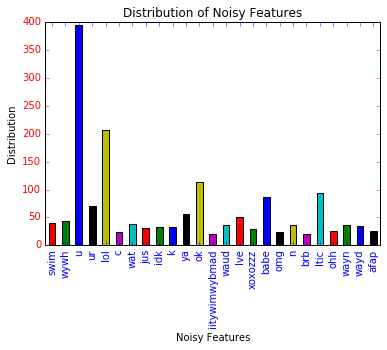

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

s = pd.Series(
    Unique_Abriviation_frequencies,
    index = Unique_Training_abrivitions
)

#Set descriptions:
plt.title("Distribution of Noisy Features")
plt.ylabel('Distribution')
plt.xlabel('Noisy Features')

#Set tick colors:
ax = plt.gca()
ax.tick_params(axis='x', colors='blue')
ax.tick_params(axis='y', colors='red')

#Plot the data:
my_colors = 'rgbkymc'  #red, green, blue, black, etc.

s.plot( 
    kind='bar', 
    color=my_colors,
)

plt.show()

In [33]:
import itertools


prop = 0.2
number_words = 22210
temp = Uni_grams
merged = list(itertools.chain(*temp))
Sample_Data_freq = []
Proportions = []
PDF = []
for j in range(5):
    actual = int(prop*number_words)
    prop = prop + 0.2
    temp = merged[0:actual]
    Proportions.append(str((float(len(temp))/22210)*100)+"%")
    for i in Unique_Training_abrivitions:
        Sum = 0
        for i in Unique_Training_abrivitions:
            Sum = Sum + temp.count(i)
    Sample_Data_freq.append(Sum)
print len(Twits)
print Sample_Data_freq
print Proportions

2095
[414, 855, 1238, 1453, 1604]
['20.0%', '40.0%', '60.0%', '80.0%', '100.0%']


:0: FutureWarning: IPython widgets are experimental and may change in the future.


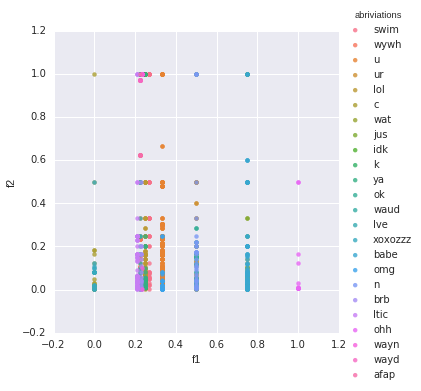

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from numpy.random import randn
%matplotlib inline
data = pd.DataFrame(dict(f1=np.array(CFeature_vector)[:,0], f2=np.array(CFeature_vector)[:,1], abriviations=CTraining_abrivitions))
sns.lmplot("f1", "f2", hue="abriviations", data=data, fit_reg=False)

plt.show()

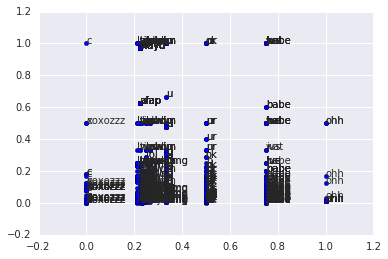

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline
y=np.array(CFeature_vector)[:,1]
z=np.array(CFeature_vector)[:,0]
n=CTraining_abrivitions
fig, ax = plt.subplots()
ax.scatter(z, y)
for i, txt in enumerate(n):
       ax.annotate(txt, (z[i],y[i]))
        
plt.show()

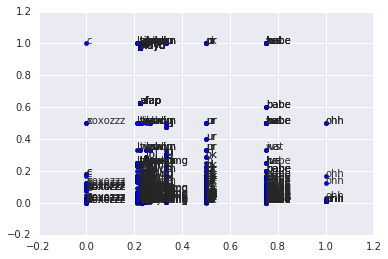

In [36]:
temp1 = []
temp2 = []
for i in range(len(CTraining_abrivitions)):
    if temp2.count(CTraining_abrivitions[i])<=100:
        temp1.append(CFeature_vector[i])
        temp2.append(CTraining_abrivitions[i])
Specified_Feature_vector = temp1
Specified_Training_abrivitions = temp2

##################################################################
import matplotlib.pyplot as plt
%matplotlib inline
y=np.array(Specified_Feature_vector)[:,1]
z=np.array(Specified_Feature_vector)[:,0]
n=Specified_Training_abrivitions
fig, ax = plt.subplots()
ax.scatter(z, y)
for i, txt in enumerate(n):
       ax.annotate(txt, (z[i],y[i]))

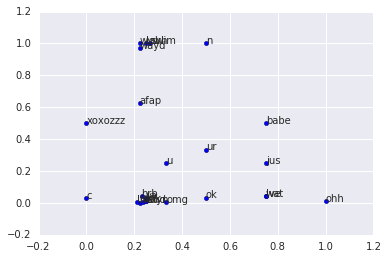

In [37]:
temp1 = []
temp2 = []
for i in range(len(CTraining_abrivitions)):
    if temp2.count(CTraining_abrivitions[i])<1:
        temp1.append(CFeature_vector[i])
        temp2.append(CTraining_abrivitions[i])
Specified_Feature_vector = temp1
Specified_Training_abrivitions = temp2

##################################################################
import matplotlib.pyplot as plt
%matplotlib inline
y=np.array(Specified_Feature_vector)[:,1]
z=np.array(Specified_Feature_vector)[:,0]
n=Specified_Training_abrivitions
fig, ax = plt.subplots()
ax.scatter(z, y)
for i, txt in enumerate(n):
       ax.annotate(txt, (z[i],y[i]))

In [38]:
print np.array(Feature_vector).shape
print len(Training_abrivitions)

(1584, 2)
1584


In [39]:
def stochastic_gradient_descent(x, y, iters):
    costs = []
    m = y.size # number of data points
    theta = np.random.rand(2) # random start
    alpha = float(0.01)
    history = [theta] # to store all thetas
    preds = []
    for i in range(iters):
        if i>0:
            alphap = alpha
            alpha = float(alphap)/float(1+(float(i)/float(len(x))))
           
        pred = np.dot(x, theta)
        error = pred - y 
        cost = np.sum(error ** 2) / (2 * m)
        costs.append(cost)
        
        if i % 25 == 0: preds.append(pred)

        gradient = x.T.dot(error)/m 
        theta = theta - alpha * gradient  # update
        #history.append(theta)
    print theta
    print "cost = "+str(cost)
    return history, costs, preds

In [40]:
iters = 10 # set number of iterations
history, cost, preds = stochastic_gradient_descent(np.array(CFeature_vector), np.array(CY_Target), iters)
theta = history[-1]

[ 8.68164746  5.24791911]
cost = 32453.2388799


In [41]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss="hinge", penalty="l2")
clf.n_iter = 500
clf.fit(np.array(CFeature_vector), np.array(CY_Target))


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=500, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False)

In [42]:
lf = SGDClassifier(loss="log")
lf.n_iter = 500
lf.fit(np.array(CFeature_vector),  np.array(CY_Target))

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', n_iter=500, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False)

In [43]:
lf.eta0

0.0

In [44]:
def hypothesis(dataset, theta):
    s = np.dot(dataset,theta)
    h = 1.0/(1.0 + np.exp(-s))
    return h

In [45]:
print hypothesis(np.array(Feature_vector[2]), lf.coef_[2])


0.00716791924915


In [46]:
List_classes = list(lf.classes_)
#print '###############################################################'
#print "We analyse here:"
#for i in range(len(CFeature_vector)):
#    Generated_Probabilities = lf.predict_proba([CFeature_vector[i]])[0]
#    print CFeature_vector[i], 
#    print Generated_Probabilities[List_classes.index(Key_Dictionary[CTraining_Target[i]])],
#    print CTraining_abrivitions[i], 
#    print CTraining_Target[i]

In [47]:
List_probabilities = lf.predict_proba(Feature_vector[0])[0]

In [48]:
class_max_prob = List_classes[List_probabilities.argmax()]
print class_max_prob

298


In [49]:
#for i in range(len(CFeature_vector)):
#    print "pridicted = " + str(lf.predict([CFeature_vector[i]])), "Actual = " + str(CY_Target[i])

In [50]:
temp1 = []
temp2 = []
for i in range(len(CFeature_vector)):
    if temp2.count(CY_Target[i])<20:
        temp1.append(CFeature_vector[i])
        temp2.append(CY_Target[i])
X1 = temp1
Y1 = temp2


In [51]:
lf = SGDClassifier(loss="log")
lf.n_iter = 100000
#lf.learning_rate = 'invscaling'
lf.fit(np.array(X1),  np.array(Y1))

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', n_iter=100000, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False)

In [52]:
List_classes = list(lf.classes_)

In [53]:
Pridicted = []
for i in range(len(X1)):
    Pridicted.append(lf.predict([X1[i]])[0])

In [54]:
from sklearn.metrics import classification_report
target_names = []
for i in List_classes:
    pos = CY_Target.index(i)
    target_names.append(CTraining_abrivitions[pos]) 
print(classification_report(Y1, Pridicted, target_names=target_names))

             precision    recall  f1-score   support

        ohh       1.00      1.00      1.00        20
       afap       1.00      0.95      0.97        20
          c       0.43      0.15      0.22        20
       babe       0.54      0.35      0.42        20
        jus       0.30      0.85      0.44        20
        lol       0.20      0.15      0.17        20
       ltic       0.33      0.10      0.15        20
        lve       0.50      0.15      0.23        20
          n       0.50      0.15      0.23        20
        omg       0.31      0.20      0.24        20
        brb       0.16      0.15      0.15        20
       swim       0.50      0.20      0.29        20
        idk       0.21      1.00      0.35        20
          u       0.80      0.20      0.32        20
         ur       0.43      0.50      0.47        20
        wat       0.75      0.15      0.25        20
       waud       0.00      0.00      0.00        20
       wayn       0.35      0.90      0.50   

/home/melvin/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:958: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [55]:
from sklearn.metrics import f1_score
print f1_score(Y1, Pridicted, average='macro')  
print f1_score(Y1, Pridicted, average='micro')  
print f1_score(Y1, Pridicted, average='weighted')

0.337604803608
0.380952380952
0.337604803608


/home/melvin/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:958: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [57]:
from sklearn.metrics import confusion_matrix
y_true = []
y_pred = []
for i in range(len(Pridicted)):
    y_true.append(CTraining_abrivitions[CY_Target.index(Y1[i])])
    y_pred.append(CTraining_abrivitions[CY_Target.index(Pridicted[i])])

In [59]:
len(List_classes)
len(Y)

320

In [60]:
def pad_list(lst):
    inner_max_len = max(map(len, lst))
    map(lambda x: x.extend([0]*(inner_max_len-len(x))), lst)
    return np.array(lst)
def apply_to_zeros(lst, dtype=np.int64):
    inner_max_len = max(map(len, lst))
    result = np.zeros([len(lst), inner_max_len], dtype)
    for i, row in enumerate(lst):
        for j, val in enumerate(row):
            result[i][j] = val
    return result

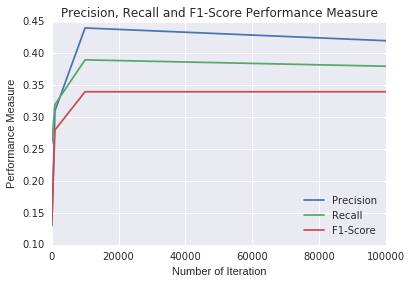

In [62]:
import matplotlib.pyplot as plt
import numpy as np
t = np.array([100.0,1000.0,10000.0,100000.0],dtype=float)

# red dashes, blue squares and green triangles
#precision = np.array([0.13, 0.31, 0.44, 0.42],dtype=float)
#recall = np.array([0.26,0.32,0.39,0.38],dtype=float)
#f1_score = np.array([0.14,0.28,0.34,0.34],dtype=float)
precision = np.array([0.13, 0.31, 0.44, 0.42],dtype=float)
recall = np.array([0.26,0.32,0.39,0.38],dtype=float)
f1_score = np.array([0.14,0.28,0.34,0.34],dtype=float)
#plt.streamplot(t, precision, 'r--', t, recall, 'bs', t, f1_score, 'g^')
plt.xlabel('Number of Iteration')
plt.ylabel('Performance Measure')
plt.title('Precision, Recall and F1-Score Performance Measure')
plt.plot(t, precision,label = 'Precision')
plt.plot(t, recall,label = 'Recall')
plt.plot(t, f1_score,label = 'F1-Score')
plt.legend(loc="lower right")
plt.show()